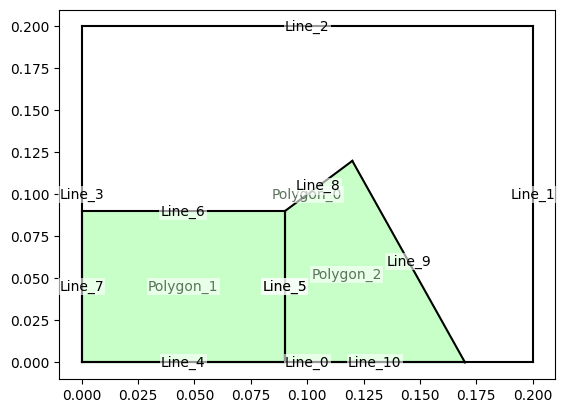

In [1]:
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)]),
                               geo.Polygon([geo.Vector(0.09, 0), geo.Vector(0.09,0.09),geo.Vector(0.12,0.12), geo.Vector(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax, labels=True)
plt.show()

In [2]:
import numpy as np
idx = (1, 5)
asd = np.random.random((6,9))

asd[idx]

0.6779035533351251

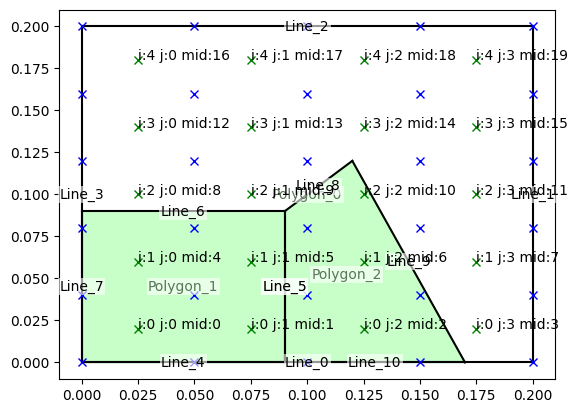

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(4, 0)
(4, 1)
(4, 2)
(4, 3)


In [3]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)
plt.show()
for k in range(rec_m.getVolumeNodeNum()):
    ij = rec_m.math2geoVolume(k)
    k2 = rec_m.geo2mathVolume(ij)
    print(ij)
    assert(k2 == k)

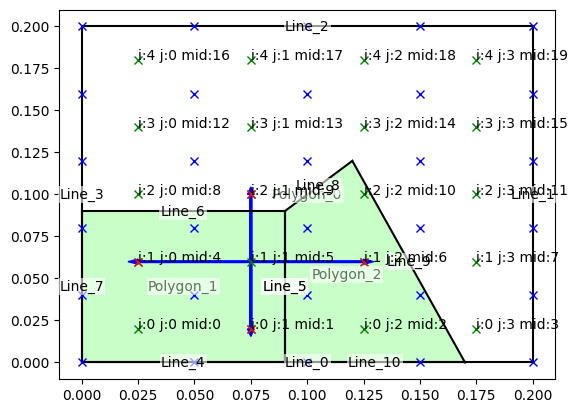

In [9]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)
node = 5
for v in rec_m.getNeighbouringVolumes(node):
    if not v:
        continue
    print(rec_m.getVNode(v))
    rec_m.getVNode(v).plot(ax, fmt = "rx")

for v in rec_m.getNeigbouringVolumeVectors(node):
    if not v:
        continue
    v.plotAsVector(ax, vect_0=rec_m.getVNode(node), )
    
plt.show()

In [6]:
thisnode[0]

TypeError: 'MeshPoint' object is not subscriptable

FACE

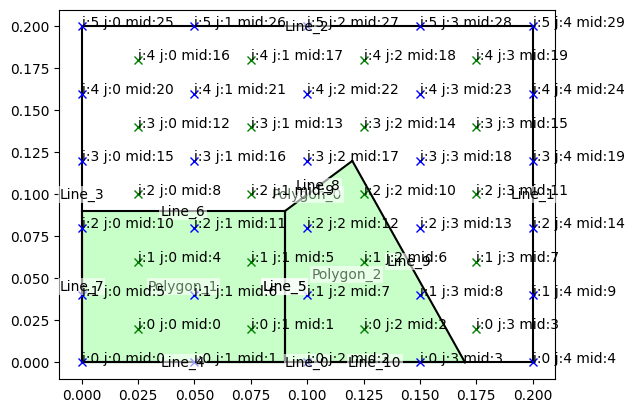

In [ ]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True, fTexts=True)


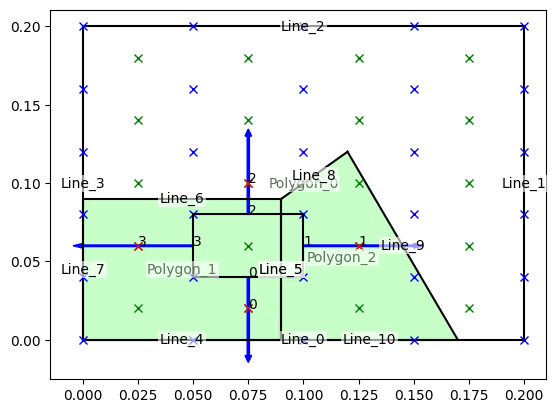

In [ ]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=False, fTexts=False)

for k in range(rec_m.getFaceNodeNum()):
    ij = rec_m.math2geoFace(k)
    k2 = rec_m.geo2mathFace(ij)
    #print(ij)
    assert(k2 == k)
selected_v=5
nf = rec_m.getNeighbouringFaceLines(selected_v)
for k in range(len(nf)):
    f = nf[k]

    
    ax.text(sum([f.p1.x, f.p2.x])/2, sum([f.p1.y, f.p2.y])/2, str(k))

    f.getNormal().plotAsVector(ax, vect_0=f.getCenter(), scale = 0.05)
    f.plot(ax)

for idx, v in enumerate(rec_m.getNeighbouringVolumes(selected_v)):
    if not v:
        continue
    rec_m.getVNode(v).plot(ax, fmt = "rx", text = str(idx))
#f_line = geo.Line(rec_m.getFNode(nf[0]), rec_m.getFNode(nf[1]))

plt.show()

In [ ]:
print(rec_m.getAreaOfElement(5))
0.05*0.2/5

0.002


0.0020000000000000005